Mohamed Ali SRIR

# Exercise 1

## Q1

The push forward operator acts like this :

$P_{\theta}\# \mu = \Sigma a_i \delta_{(\theta^T x_i)}$

$P_{\theta}\# \nu = \Sigma b_j \delta_{(\theta^T y_j)}$

It's an operator that describes how the mass is moved with the mapping $P_{\theta}$ which is a projection from $R^d$ to $R$, giving a new distribution, what are the new values in $R$ and what are their weights (if theta is 0d for example all the mass would be in 0). 

## Q2

The expression is :

$W_2²(P_{\theta}\# \mu,P_{\theta}\# \nu) = min_{\Pi(P_{\theta}\# \mu,P_{\theta}\# \nu)} (\int |\theta^T (x-y)|²d_\Pi )$

In practice is we have sorted values of $\theta^T x$ and $\theta^T y$ we just need to assigned the smallest values together until we complete the weight and move to the one after. (Generalized version of what we saw in the course)

## Q3

In [78]:
import numpy as np
import ot
import matplotlib.pyplot as plt

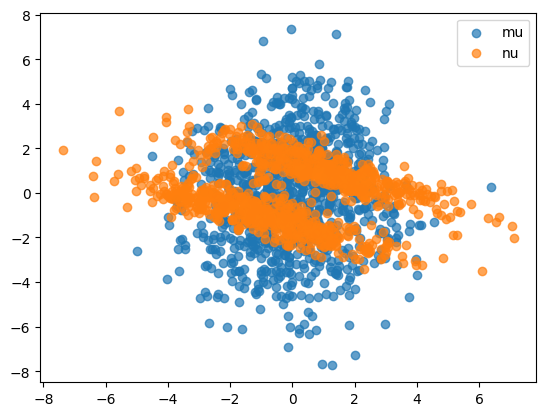

In [79]:
def generate_data(n, d):
    means = [-np.ones(d), np.ones(d)]
    # random covariance matrix
    A = np.random.randn(d, d)
    cov = np.dot(A, A.T) # ensure positive semi -definiteness
    # sample points
    idx = np.random.choice(2, size=n)
    samples = np.array([np.random.multivariate_normal(means[comp], cov) for
    comp in idx])
    return samples

n = 1000 # number of samples
d = 2 # data dimension
Xs = generate_data(n,d)
Ys = generate_data(n,d)
plt.plot()
plt.scatter(Xs[:, 0], Xs[:, 1], label="mu",alpha =0.7)
plt.scatter(Ys[:, 0], Ys[:, 1], label="nu", alpha =0.7)
plt.legend ()
plt.show()

In [80]:
def sliced_wasserstein(X, Y, m=100):
    d = X.shape [1]
    sw2 = 0.0
    for _ in range(m):
        # Sample a random vector uniformly on the unit sphere
        theta = np.random.randn(d,1)
        theta /= np.linalg.norm(theta)
        # Implement answer to question 1
        X_theta = X @ theta # to complete
        Y_theta = Y @ theta # to complete
        # Compute W2 (answer to question 2)
        otd = ot.dist(X_theta,Y_theta,metric='euclidean')
        w2 = ot.emd2(np.ones(X_theta.shape[0])/X_theta.shape[0],
                     np.ones(Y_theta.shape[0])/Y_theta.shape[0],otd)# to complete
        sw2 += w2
    sw2 /= m
    return np.sqrt(sw2)

## Q4

In discrete measures on $R$ the complexity is in $O(n\log(n))$, in $SW_2$ we do it $m$ times so it's in $O(mn\log(n))$.

While computing $W_2$ is in $O(n³\log(n))$

## Q5

If m is high, runtime is higher, but we should have less variance between our experiments

In [84]:
sliced_wasserstein(Xs, Ys, m=5)

np.float64(0.32748982753612177)

In [85]:
sliced_wasserstein(Xs, Ys, m=5)

np.float64(0.35906371751767174)

In [86]:
sliced_wasserstein(Xs, Ys, m=100)

np.float64(0.34632403257616445)

In [87]:
sliced_wasserstein(Xs, Ys, m=100)

np.float64(0.35081447890675876)

## Q6

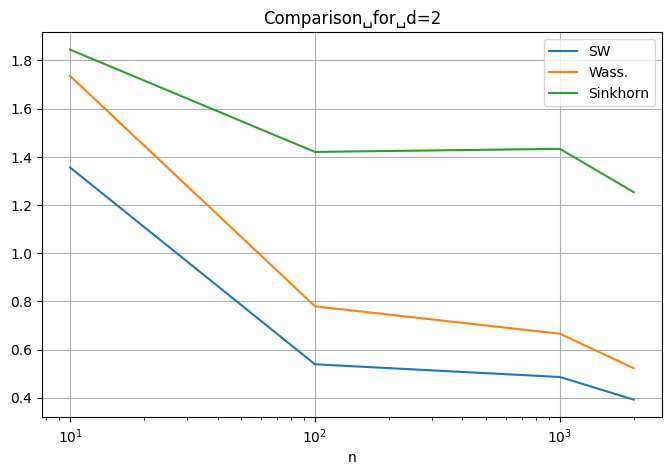

In [82]:
d = 2
ns = np.array ([10, 100 ,1000, 2000])
len_n = len(ns)
sw2s = np.zeros(len_n)
w2s = np.zeros(len_n)
entropy_w2s = np.zeros(len_n)
for i in range(len_n):
# generate data from the same distribution
    n = ns[i]
    data = generate_data(n,d)
    Xs = data[:int(n/2)]
    Ys = data[int(n/2):]
    M = ot.dist(Xs,Ys,metric='euclidean')# to complete
    a = np.ones(Xs.shape[0])/Xs.shape[0]# to complete
    b = np.ones(Ys.shape[0])/Ys.shape[0] # to complete
    sw2s[i] = sliced_wasserstein(Xs, Ys, m=100)
    w2s[i] = np.sqrt(ot.emd2(a, b, M))
    entropy_w2s[i] = np.sqrt(ot.sinkhorn2(a, b, M, reg=2))
# Plot the results
plt.figure(figsize =(8, 5))
plt.plot(ns , sw2s , label="SW")
plt.plot(ns , w2s , label="Wass.")
plt.plot(ns , entropy_w2s , label="Sinkhorn")
plt.xscale("log") # log scale for better visualization
plt.xlabel("n")
plt.title(f"Comparison␣for␣d={d}")
plt.legend ()
plt.grid(True)
plt.show()

## Q8

For both Wasserstein and sliced Wasserstein, the distance is smaller and tends to 0 as n increase, which makes sense as theoritically we should expect a value of zero since it's the same distribution.

However for sinkhorn it sometimes diverges, potentially because the regularization term outweights the wasserstein term. It's not a distance like the two others. 


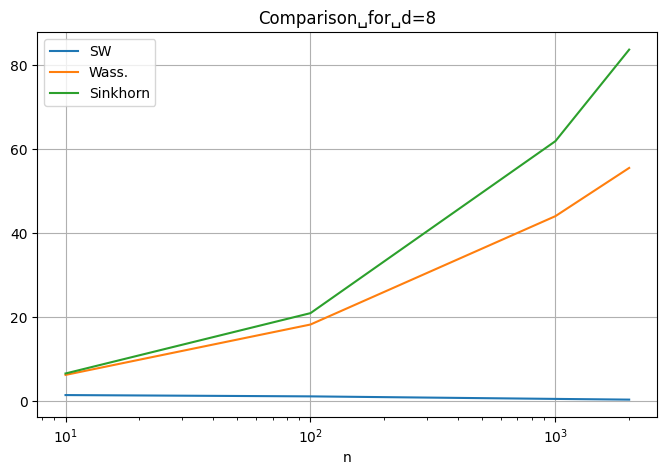

In [83]:
d = 8
ns = np.array ([10, 100 ,1000, 2000])
len_n = len(ns)
sw2s = np.zeros(len_n)
w2s = np.zeros(len_n)
entropy_w2s = np.zeros(len_n)
for i in range(len_n):
# generate data from the same distribution
    n = ns[i]
    data = generate_data(n,d)
    Xs = data[:int(n/2)]
    Ys = data[int(n/2):]
    M = ot.dist(Xs,Ys,metric='euclidean')# to complete
    a = np.ones(Xs.shape[0])# to complete
    b = np.ones(Ys.shape[0]) # to complete
    sw2s[i] = sliced_wasserstein(Xs, Ys, m=100)
    w2s[i] = np.sqrt(ot.emd2(a, b, M))
    entropy_w2s[i] = np.sqrt(ot.sinkhorn2(a, b, M, reg=2))
# Plot the results
plt.figure(figsize =(8, 5))
plt.plot(ns , sw2s , label="SW")
plt.plot(ns , w2s , label="Wass.")
plt.plot(ns , entropy_w2s , label="Sinkhorn")
plt.xscale("log") # log scale for better visualization
plt.xlabel("n")
plt.title(f"Comparison␣for␣d={d}")
plt.legend ()
plt.grid(True)
plt.show()

When d increases, we can see that for SW we still have the same results, but with Wasserstein it diverges (curse of dimensionality !). Same for Sinkhorn we have a divergence.

## Q9

I think that yes, because if multiple projection are the same it makes sense that the whole distribution is the same.